In [11]:
import os
import cv2

import numpy as np 
from PIL import Image
import matplotlib.pyplot as plt 
from utils import plot_img_2_pair, plot_hist_curve_2_pair


In [2]:
datasets = './data'
raw_dataset = f"{datasets}/raw-890/raw-890"
raw_ref_dataset = f"{datasets}/reference-890/reference-890"

def get_data_pair(idx):
    return f"{raw_dataset}/{idx}_img_.png", f"{raw_ref_dataset}/{idx}_img_.png"

In [3]:
def apply_clahe(path, alpha, tile):
    img_bgr = cv2.imread(path)

    if img_bgr is None:
        print("Error: Could not load image.")
    else:
        # 1. Convert BGR to LAB color space
        img_lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)

        # 2. Split the LAB image into L, A, and B channels
        l, a, b = cv2.split(img_lab)
        histL = cv2.calcHist([l], [0], None, [256], [0, 256])
        # 3. Apply CLAHE to the L channel
        clahe = cv2.createCLAHE(clipLimit=alpha, tileGridSize=tile)
        cl = clahe.apply(l)
        histCL = cv2.calcHist([cl], [0], None, [256], [0, 256])
        # 4. Merge the channels and convert back to BGR
        merged_lab = cv2.merge((cl, a, b))
        enhanced_img = cv2.cvtColor(merged_lab, cv2.COLOR_LAB2BGR)

    return enhanced_img, histL, histCL

In [4]:
path_raw, path_ref = get_data_pair(3)

In [5]:
img_bgr = cv2.imread(path_ref)
enhanced_img, histL, histCL = apply_clahe(path_raw, 10, (25,25))

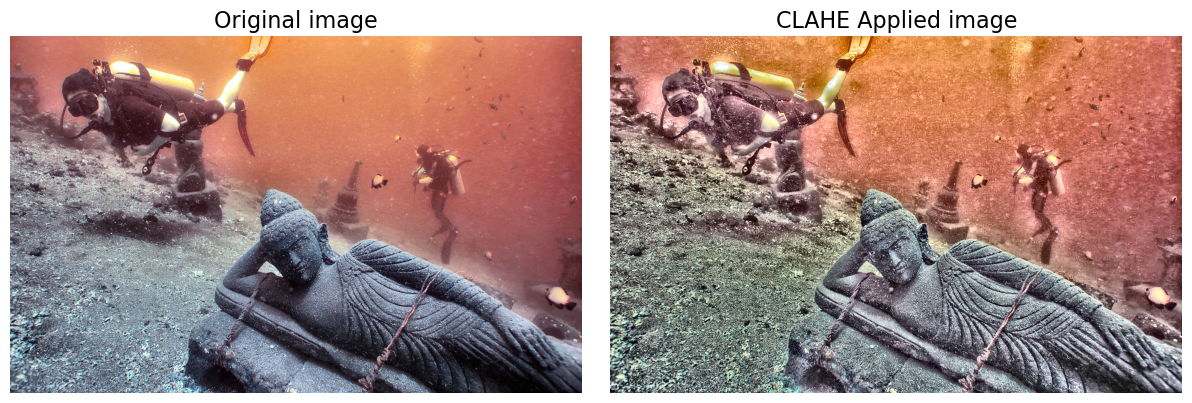

In [6]:
plot_img_2_pair(
    img_bgr,
    enhanced_img,
    title1="Original image",
    title2="CLAHE Applied image",
)

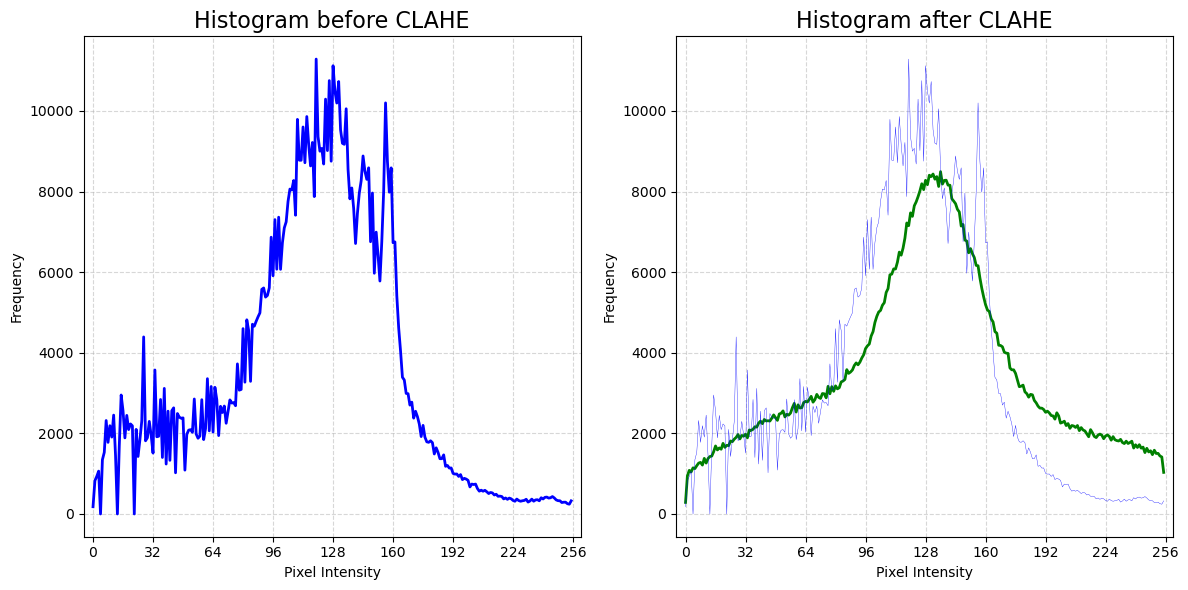

In [12]:
plot_hist_curve_2_pair(
    histL,
    histCL,
    "Histogram before CLAHE",
    "Histogram after CLAHE",
    overlay_1_on_2 = True,
)